___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and **the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.** 

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import plotly.express as px
sns.set()

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (12,8)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_columns', None)

In [4]:
df0 = pd.read_csv('Churn_Modelling.csv')
df = df0.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,4,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum().any()

False

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0000,5000.5000,2886.8957,1.0000,2500.7500,5000.5000,7500.2500,10000.0000
CustomerId,10000.0000,15690940.5694,71936.1861,15565701.0000,15628528.2500,15690738.0000,15753233.7500,15815690.0000
CreditScore,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
Age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
Tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
Balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
NumOfProducts,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800


The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- `*` **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,4,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


## Drop Collumns

In [11]:
drop_cols = ["RowNumber", "CustomerId", "Surname"]

In [12]:
df = df.drop(drop_cols, axis = 1)

## CreditScore

In [13]:
import plotly.express as px 
fig = px.histogram(df['CreditScore'], nbins=60, marginal="box",  opacity=0.75)
fig.show()

## Geography

In [14]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

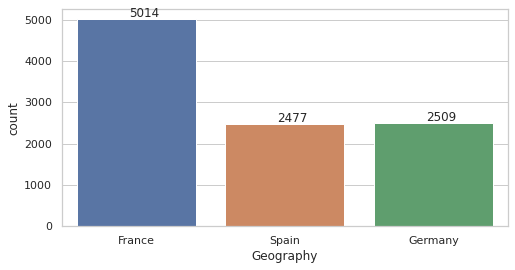

In [15]:
plt.rcParams["figure.figsize"] = (8, 4)
ax = sns.countplot(df["Geography"])
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 50))

plt.show()

## Gender

In [16]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

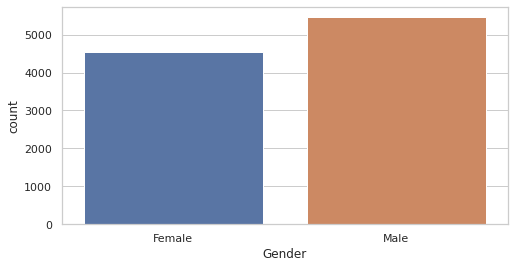

In [17]:
sns.countplot(df["Gender"]);

## Age

In [18]:
df.Age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [19]:
fig = px.histogram(df['Age'], nbins=60, marginal="box",  opacity=0.75)
fig.show()

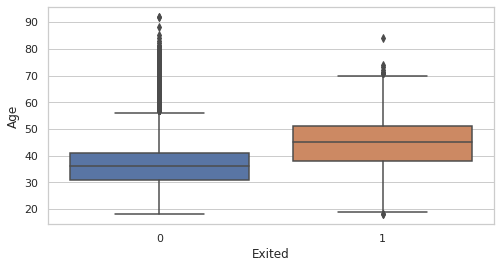

In [20]:
sns.boxplot(x = 'Exited', y = 'Age', data = df);

## Tenure

In [21]:
# The number of years for which the customer has been with the bank.
df['Tenure'].value_counts(dropna = False)

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [22]:
fig = px.histogram(df['Tenure'], marginal="box",  opacity=0.75)
fig.show()

## Balance

In [23]:
df['Balance'].value_counts(dropna = False)

0.0000         3617
130170.8200       2
105473.7400       2
85304.2700        1
159397.7500       1
               ... 
81556.8900        1
112687.6900       1
108698.9600       1
238387.5600       1
130142.7900       1
Name: Balance, Length: 6382, dtype: int64

In [24]:
fig = px.histogram(df['Balance'], nbins=60, marginal="box",  opacity=0.75)
fig.show()

## NumOfProducts

In [25]:
df['NumOfProducts'].value_counts(dropna = False)

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

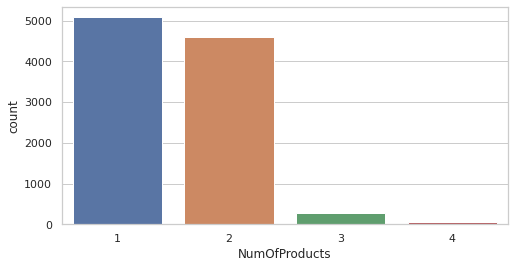

In [26]:
sns.countplot(df['NumOfProducts']);

## HasCrCard

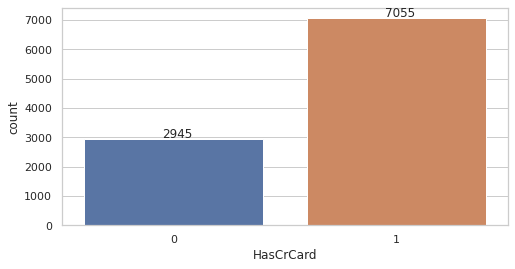

In [27]:
# number of credit cards 
plt.rcParams["figure.figsize"] = (8, 4)
ax = sns.countplot(df["HasCrCard"])
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 50))

plt.show()

## IsActiveMember

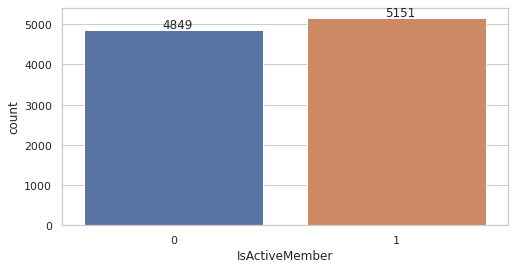

In [28]:
plt.rcParams["figure.figsize"] = (8, 4)
ax = sns.countplot(df["IsActiveMember"])
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 50))

plt.show()

## EstimatedSalary

In [29]:
fig = px.histogram(df['EstimatedSalary'], nbins=100, marginal="box",  opacity=0.75)
fig.show()

## Exited

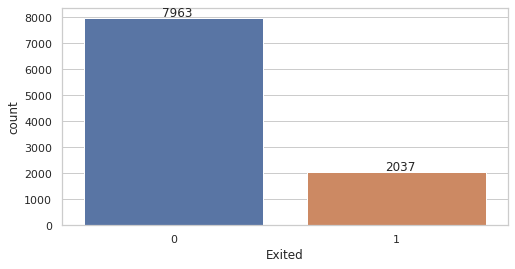

In [30]:
plt.rcParams["figure.figsize"] = (8, 4)
ax = sns.countplot(df["Exited"])
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 50))

plt.show()

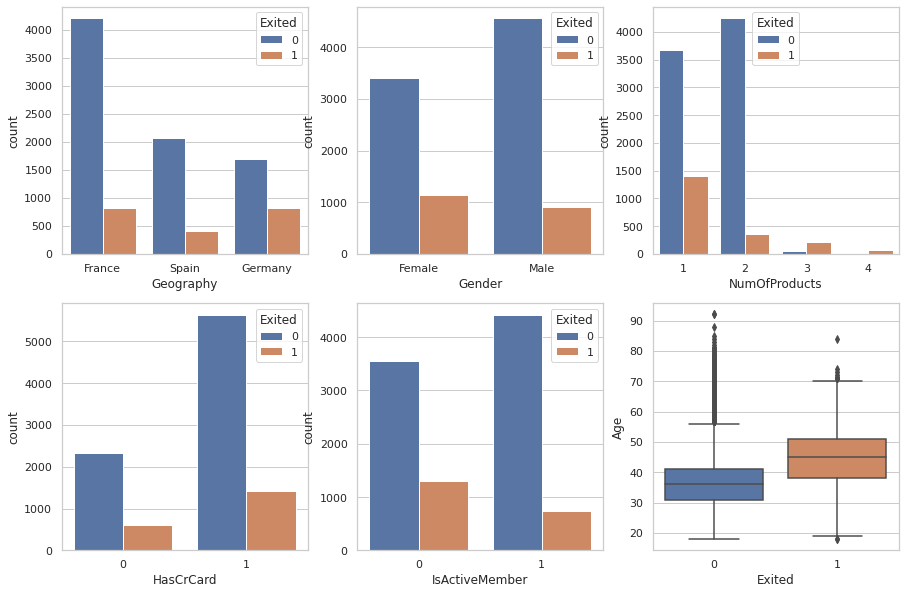

In [31]:
category = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember"]
index = 0
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i in category:
    index += 1
    plt.subplot(2, 3, index)
    sns.countplot(data=df, x=i, hue="Exited")

sns.boxplot(x='Exited', y='Age', data=df, ax=axes[1,2]);

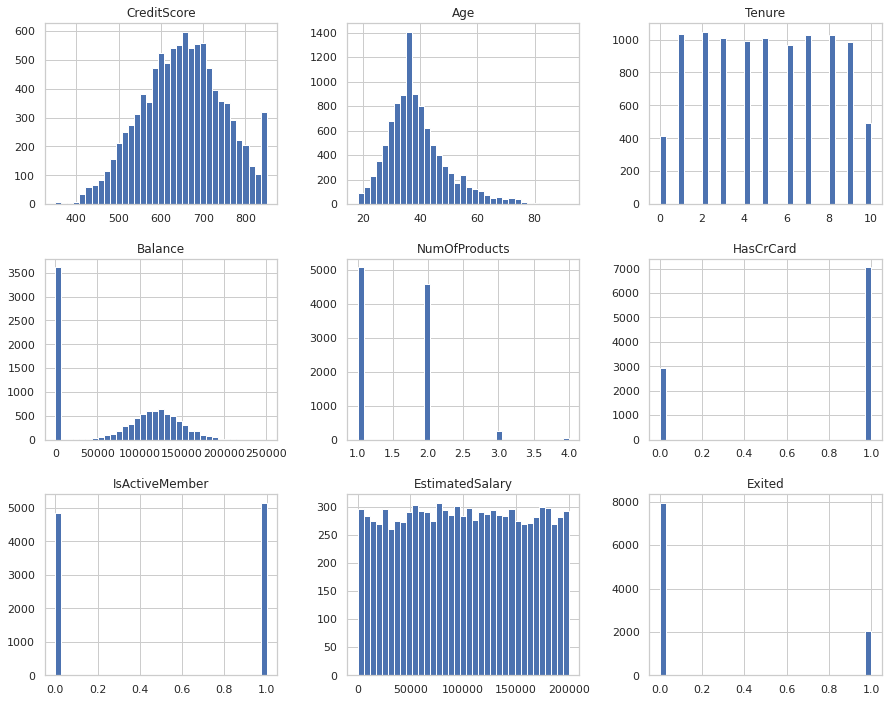

In [32]:
df.hist(figsize=(15, 12), bins=35);

In [33]:
df.corr()[['Exited']].sort_values(by='Exited', ascending=False)

,Exited
Exited,1.0000
Age,0.2853
Balance,0.1185
EstimatedSalary,0.0121
HasCrCard,-0.0071
Tenure,-0.0140
CreditScore,-0.0271
NumOfProducts,-0.0478
IsActiveMember,-0.1561


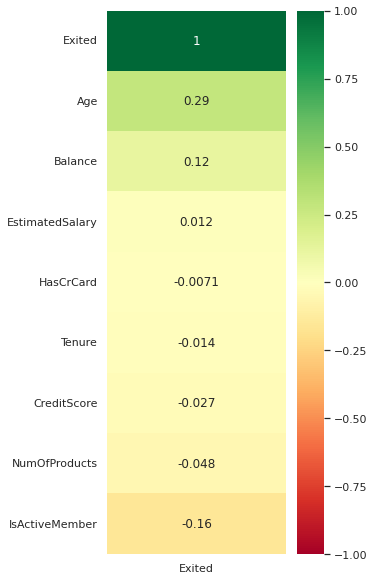

In [34]:
# for the target variable
plt.figure(figsize=(4, 10))
sns.heatmap(data=df.corr()[['Exited']].sort_values(by='Exited', ascending=False),
            vmin = -1, vmax = 1, 
            annot=True, 
            cmap='RdYlGn');


## Dummy

In [35]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0000,1,1,1,101348.8800,1,0,0,0
1,608,41,1,83807.8600,1,0,1,112542.5800,0,0,1,0
2,502,42,8,159660.8000,3,1,0,113931.5700,1,0,0,0
3,699,39,1,0.0000,2,0,0,93826.6300,0,0,0,0
4,850,43,2,125510.8200,1,1,1,79084.1000,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [37]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [38]:
seed = 24

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=seed)

In [40]:
from sklearn.preprocessing import RobustScaler 

In [41]:
scaler = RobustScaler()

In [42]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
print(X_train.shape)
print(X_test.shape)

(9000, 11)
(1000, 11)


# Modelling & Model Performance

## without class_weigth

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['Recall'])


In [46]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(11, 16) dtype=float32, numpy=
 array([[-0.36837447, -0.22607738,  0.24830112,  0.43973538,  0.16066983,
          0.0663906 , -0.3650106 , -0.11779022,  0.1427488 , -0.22642872,
          0.03404823, -0.43814865, -0.38936123,  0.34081718, -0.23185667,
          0.40434697],
        [ 0.15081987, -0.33282176, -0.13070905,  0.42700896,  0.08787593,
          0.44344822,  0.403218  ,  0.28212717, -0.26703817, -0.41997963,
         -0.27203107, -0.10837394, -0.24725409, -0.34044832, -0.2626577 ,
          0.18486777],
        [ 0.39621142, -0.13641644, -0.1829144 ,  0.20753571, -0.04155332,
         -0.00973907,  0.46157107,  0.4031354 , -0.28444493, -0.04418126,
         -0.45733264,  0.08380786, -0.15519166, -0.09913749, -0.17334583,
          0.39419934],
        [ 0.10638395,  0.13902685, -0.00900427, -0.405305  ,  0.11019155,
         -0.37303412, -0.01364625, -0.1007902 ,  0.07408997,  0.3557439 ,
         -0.40913126, -0.29609972,  0.10079738, -

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=25,
                           restore_best_weights=True)

**Early stopping** is a feature that enables the training to be automatically stopped when a chosen metric has stopped improving. <br><a href="https://medium.com/zero-equals-false/early-stopping-to-avoid-overfitting-in-neural-network-keras-b68c96ed05d9" target="_blank">Early Stopping to avoid overfitting in neural network-Keras</a> <br>
<br><a href="https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/" target="_blank">Use Early Stopping to Halt the Training of Neural Networks At the Right Time</a> <br>


- **Monitor:** Performance measure to monitor in order to end training 
- **Mode:**  argument will need to be specified as whether the objective of the chosen metric is to increase (maximize or ‘max‘) or to decrease (minimize or ‘min‘).
- **patience**: This is the number of epochs without improvement after which training will be early stopped

In [49]:
Epochs = 1000
Batch = 153

In [50]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/1000
50/50 [==============================] - 4s 11ms/step - loss: 0.6612 - recall: 0.0812 - val_loss: 0.5987 - val_recall: 0.0000e+00
Epoch 2/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5633 - recall: 6.2500e-04 - val_loss: 0.4884 - val_recall: 0.0000e+00
Epoch 3/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5066 - recall: 0.0000e+00 - val_loss: 0.4518 - val_recall: 0.0000e+00
Epoch 4/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4823 - recall: 0.0000e+00 - val_loss: 0.4360 - val_recall: 0.0000e+00
Epoch 5/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4593 - recall: 0.0000e+00 - val_loss: 0.4200 - val_recall: 0.0000e+00
Epoch 6/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4415 - recall: 0.0000e+00 - val_loss: 0.4118 - val_recall: 0.0000e+00
Epoch 7/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4308 - recall: 0.0000e+00 - val_loss: 0.4054 - val_

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [52]:
loss_df = pd.DataFrame(model.history.history) 
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.6612,0.0812,0.5987,0.0000
1,0.5633,0.0006,0.4884,0.0000
2,0.5066,0.0000,0.4518,0.0000
3,0.4823,0.0000,0.4360,0.0000
4,0.4593,0.0000,0.4200,0.0000


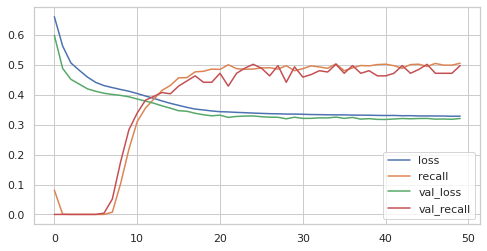

In [53]:
loss_df.plot();

In [54]:
model.evaluate(X_test, y_test, verbose=0)

[0.35610106587409973, 0.47549018263816833]

###  Prediction to see "confusion matrix" and "classification report"

In [55]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")  
# 1 olma ihtimali 0.5 ten büyükse 1 yap
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[753  43]
 [107  97]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.69      0.48      0.56       204

    accuracy                           0.85      1000
   macro avg       0.78      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



###  ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

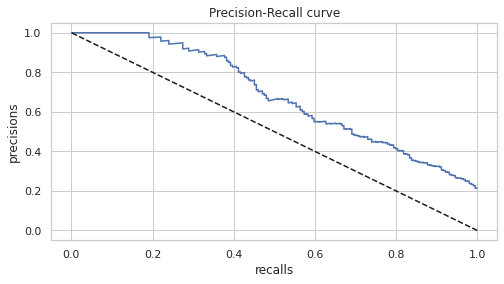

In [57]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.plot([1, 0], [0, 1], 'k--')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, sınıflandırma performansını gosterir

In [58]:
average_precision_score(y_test, y_pred_proba)

0.6819936994254066

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

<a href="https://androidkt.com/set-class-weight-for-imbalance-dataset-in-keras/" target="_blank">How to set class weight for imbalance dataset in Keras?</a>



### Create The Model

In [59]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['Recall'])

In [60]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights


{0: 0.6278777731268314, 1: 2.454991816693944}

In [61]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=25)

In [62]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/1000
50/50 [==============================] - 1s 8ms/step - loss: 0.7003 - recall: 0.8750 - val_loss: 0.7049 - val_recall: 0.9871
Epoch 2/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6936 - recall: 0.9887 - val_loss: 0.7165 - val_recall: 1.0000
Epoch 3/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6815 - recall: 0.8581 - val_loss: 0.7306 - val_recall: 0.8412
Epoch 4/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6621 - recall: 0.8394 - val_loss: 0.7444 - val_recall: 0.8326
Epoch 5/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6394 - recall: 0.8462 - val_loss: 0.7322 - val_recall: 0.8026
Epoch 6/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6193 - recall: 0.8169 - val_loss: 0.7181 - val_recall: 0.7768
Epoch 7/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6018 - recall: 0.7906 - val_loss: 0.6906 - val_recall: 0.7382
Epoch 8/1000
50/50 [==============

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                192       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

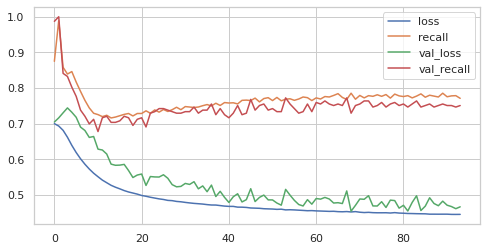

In [64]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [65]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# recall result is better on without class_weight but precision is better with class_weight
#      precision    recall  f1-score   support
# 0       0.88      0.95      0.91       789
# 1       0.71      0.51      0.59       211

[[625 171]
 [ 49 155]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       796
           1       0.48      0.76      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.84      0.78      0.80      1000



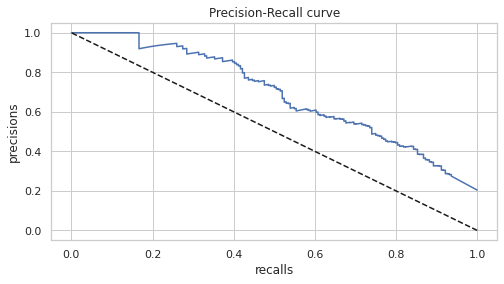

In [66]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.plot([1,0],[0,1],'k--')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [67]:
average_precision_score(y_test, y_pred_proba) 
# result without class: 0.7086642122934683

0.6891929001108188

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [68]:
from tensorflow.keras.optimizers import Adam

In [69]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr = 0.003)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['Recall'])

In [70]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/1000
50/50 [==============================] - 1s 8ms/step - loss: 0.5854 - recall: 0.0356 - val_loss: 0.4593 - val_recall: 0.0000e+00
Epoch 2/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4807 - recall: 0.0000e+00 - val_loss: 0.4241 - val_recall: 0.0000e+00
Epoch 3/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4356 - recall: 0.0644 - val_loss: 0.4002 - val_recall: 0.1888
Epoch 4/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4163 - recall: 0.3113 - val_loss: 0.3926 - val_recall: 0.3648
Epoch 5/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4012 - recall: 0.3713 - val_loss: 0.3784 - val_recall: 0.3777
Epoch 6/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.3785 - recall: 0.4381 - val_loss: 0.3573 - val_recall: 0.3906
Epoch 7/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3588 - recall: 0.4619 - val_loss: 0.3408 - val_recall: 0.4206
Epoch 8/1000
50/50 [==

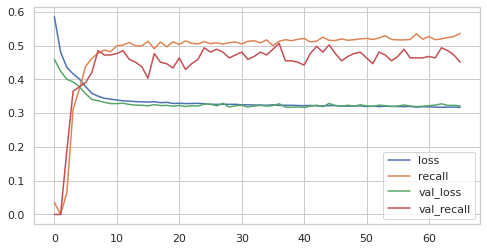

In [71]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [72]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.36234205961227417
recall :  0.44607841968536377


In [73]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[760  36]
 [113  91]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.72      0.45      0.55       204

    accuracy                           0.85      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



In [74]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.204     , 0.27442529, 0.27482014, 0.27521614, 0.27561328,
        0.27601156, 0.276411  , 0.27681159, 0.27721335, 0.27761628,
        0.27802038, 0.27842566, 0.27883212, 0.27923977, 0.27964861,
        0.28005865, 0.2804699 , 0.28088235, 0.28129602, 0.28171091,
        0.28212703, 0.28254438, 0.28296296, 0.28189911, 0.28231798,
        0.2827381 , 0.28315946, 0.28358209, 0.28400598, 0.28443114,
        0.28485757, 0.28528529, 0.28571429, 0.28614458, 0.28657617,
        0.28700906, 0.28593041, 0.28636364, 0.28679818, 0.28723404,
        0.28767123, 0.28810976, 0.2870229 , 0.28746177, 0.28790199,
        0.28834356, 0.28878648, 0.28923077, 0.28967643, 0.29012346,
        0.29057187, 0.29102167, 0.29147287, 0.29192547, 0.29237947,
        0.29283489, 0.29329173, 0.29375   , 0.2942097 , 0.29467085,
        0.29513344, 0.29559748, 0.29606299, 0.29652997, 0.29699842,
        0.29746835, 0.29793978, 0.2984127 , 0.29888712, 0.29936306,
        0.29984051, 0.30031949, 0.3008    , 0.30

### Add Dropout Layer

In [75]:
from tensorflow.keras.layers import Dropout

In [76]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr = 0.001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['Recall'])

### Add Early Stop

#### Monitor the "val_loss" as metric

In [77]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15)

In [78]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/1000
50/50 [==============================] - 1s 8ms/step - loss: 0.6681 - recall: 0.1000 - val_loss: 0.6159 - val_recall: 0.0043
Epoch 2/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5958 - recall: 0.0056 - val_loss: 0.5042 - val_recall: 0.0000e+00
Epoch 3/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5408 - recall: 0.0000e+00 - val_loss: 0.4594 - val_recall: 0.0000e+00
Epoch 4/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5147 - recall: 6.2500e-04 - val_loss: 0.4416 - val_recall: 0.0000e+00
Epoch 5/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4928 - recall: 0.0012 - val_loss: 0.4268 - val_recall: 0.0000e+00
Epoch 6/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4805 - recall: 0.0031 - val_loss: 0.4183 - val_recall: 0.0000e+00
Epoch 7/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4649 - recall: 0.0069 - val_loss: 0.4083 - val_recall: 0.0000e+00
Ep

 - model egitildikce val_loss degeri giderek dustu 

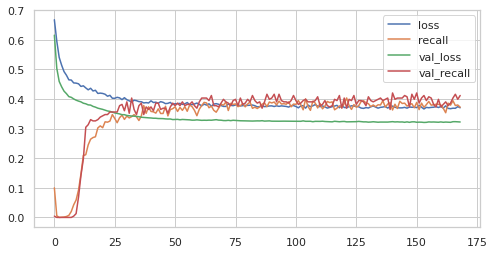

In [79]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [80]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3488961458206177
recall :  0.4313725531101227


In [81]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# results without class
#      precision    recall  f1-score   support
# 0       0.88      0.95      0.91       789
# 1       0.71      0.51      0.59       211

[[775  21]
 [116  88]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.81      0.43      0.56       204

    accuracy                           0.86      1000
   macro avg       0.84      0.70      0.74      1000
weighted avg       0.86      0.86      0.85      1000



In [82]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.204     , 0.27442529, 0.27482014, 0.27521614, 0.27561328,
        0.27601156, 0.276411  , 0.27681159, 0.27721335, 0.27761628,
        0.27802038, 0.27842566, 0.27883212, 0.27923977, 0.27964861,
        0.28005865, 0.2804699 , 0.28088235, 0.28129602, 0.28171091,
        0.28212703, 0.28254438, 0.28296296, 0.28189911, 0.28231798,
        0.2827381 , 0.28315946, 0.28358209, 0.28400598, 0.28443114,
        0.28485757, 0.28528529, 0.28571429, 0.28614458, 0.28657617,
        0.28700906, 0.28593041, 0.28636364, 0.28679818, 0.28723404,
        0.28767123, 0.28810976, 0.2870229 , 0.28746177, 0.28790199,
        0.28834356, 0.28878648, 0.28923077, 0.28967643, 0.29012346,
        0.29057187, 0.29102167, 0.29147287, 0.29192547, 0.29237947,
        0.29283489, 0.29329173, 0.29375   , 0.2942097 , 0.29467085,
        0.29513344, 0.29559748, 0.29606299, 0.29652997, 0.29699842,
        0.29746835, 0.29793978, 0.2984127 , 0.29888712, 0.29936306,
        0.29984051, 0.30031949, 0.3008    , 0.30

#### Monitor the "val_recall" as metric

In [83]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


opt = Adam(lr = 0.001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['Recall'])

In [84]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="auto",
                           verbose=1,
                           patience=20)

In [85]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/1000
50/50 [==============================] - 1s 9ms/step - loss: 0.6681 - recall: 0.1000 - val_loss: 0.6159 - val_recall: 0.0043
Epoch 2/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5958 - recall: 0.0056 - val_loss: 0.5042 - val_recall: 0.0000e+00
Epoch 3/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5408 - recall: 0.0000e+00 - val_loss: 0.4594 - val_recall: 0.0000e+00
Epoch 4/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5147 - recall: 6.2500e-04 - val_loss: 0.4416 - val_recall: 0.0000e+00
Epoch 5/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4928 - recall: 0.0012 - val_loss: 0.4268 - val_recall: 0.0000e+00
Epoch 6/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4805 - recall: 0.0031 - val_loss: 0.4183 - val_recall: 0.0000e+00
Epoch 7/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4649 - recall: 0.0069 - val_loss: 0.4083 - val_recall: 0.0000e+00
Ep

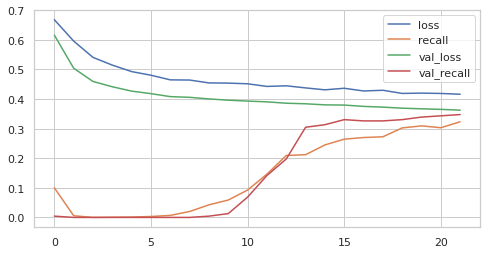

In [86]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

# early_stop erken kapandigi icin model ogrenemedi

In [87]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3860663175582886
recall :  0.38725489377975464


In [88]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[776  20]
 [125  79]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.80      0.39      0.52       204

    accuracy                           0.85      1000
   macro avg       0.83      0.68      0.72      1000
weighted avg       0.85      0.85      0.83      1000



In [89]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.204     , 0.27442529, 0.27482014, 0.27521614, 0.27561328,
        0.27601156, 0.276411  , 0.27681159, 0.27721335, 0.27761628,
        0.27802038, 0.27842566, 0.27883212, 0.27923977, 0.27964861,
        0.28005865, 0.2804699 , 0.28088235, 0.28129602, 0.28171091,
        0.28212703, 0.28254438, 0.28296296, 0.28189911, 0.28231798,
        0.2827381 , 0.28315946, 0.28358209, 0.28400598, 0.28443114,
        0.28485757, 0.28528529, 0.28571429, 0.28614458, 0.28657617,
        0.28700906, 0.28593041, 0.28636364, 0.28679818, 0.28723404,
        0.28767123, 0.28810976, 0.2870229 , 0.28746177, 0.28790199,
        0.28834356, 0.28878648, 0.28923077, 0.28967643, 0.29012346,
        0.29057187, 0.29102167, 0.29147287, 0.29192547, 0.29237947,
        0.29283489, 0.29329173, 0.29375   , 0.2942097 , 0.29467085,
        0.29513344, 0.29559748, 0.29606299, 0.29652997, 0.29699842,
        0.29746835, 0.29793978, 0.2984127 , 0.29888712, 0.29936306,
        0.29984051, 0.30031949, 0.3008    , 0.30

# Final Model and Model Deployment

In [90]:
scaler = RobustScaler().fit(X)

In [91]:
import pickle
pickle.dump(scaler, open("scaler_churn_recall", 'wb'))

In [92]:
X_scaled = scaler.transform(X)

In [93]:
tf.random.set_seed(seed)
final_model = Sequential()
final_model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
final_model.add(Dense(8, activation='relu'))
final_model.add(Dense(4, activation='relu'))
final_model.add(Dense(1, activation='sigmoid'))

final_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['Recall'])

In [94]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [95]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=20)

In [96]:
final_model.fit(x=X_train,
                y=y_train,
                validation_split=0.15,
                batch_size=Batch,
                epochs=Epochs,
                verbose=1,
                callbacks=[early_stop],
                class_weight=class_weights)

Epoch 1/1000
50/50 [==============================] - 1s 9ms/step - loss: 0.7003 - recall: 0.8750 - val_loss: 0.7049 - val_recall: 0.9871
Epoch 2/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6936 - recall: 0.9887 - val_loss: 0.7165 - val_recall: 1.0000
Epoch 3/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6815 - recall: 0.8581 - val_loss: 0.7306 - val_recall: 0.8412
Epoch 4/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6621 - recall: 0.8394 - val_loss: 0.7444 - val_recall: 0.8326
Epoch 5/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6394 - recall: 0.8462 - val_loss: 0.7322 - val_recall: 0.8026
Epoch 6/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6193 - recall: 0.8169 - val_loss: 0.7181 - val_recall: 0.7768
Epoch 7/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.6018 - recall: 0.7906 - val_loss: 0.6906 - val_recall: 0.7382
Epoch 8/1000
50/50 [==============

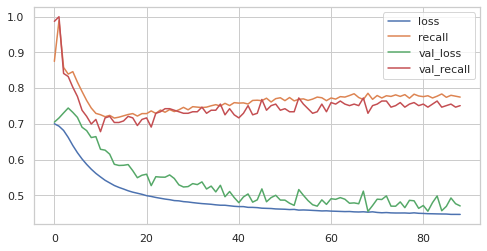

In [97]:
loss_df = pd.DataFrame(final_model.history.history)
loss_df.plot();

In [98]:
loss, recall = final_model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.469066321849823
recall :  0.7598039507865906


In [99]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[627 169]
 [ 49 155]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       796
           1       0.48      0.76      0.59       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.84      0.78      0.80      1000



In [100]:
final_model.save('model_churn_recall.h5')

## Loading Model

In [101]:
from tensorflow.keras.models import load_model

In [102]:
model_exited = load_model('model_churn_recall.h5')

In [103]:
scaler_fake_churn = pickle.load(open("scaler_churn_recall", "rb"))

## Prediction

In [104]:
sample = df.sample(n=20, random_state=101).iloc[0:20, :11]
sample


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
6676,619,52,8,0.0000,2,1,1,123242.1100,0,0,1
6421,616,23,8,73112.9500,1,1,1,62733.0500,0,0,0
9834,516,46,6,62212.2900,1,0,1,171681.8600,1,0,0
8492,494,28,9,114731.7600,2,0,1,79479.7400,0,0,0
9982,655,46,7,137145.1200,1,1,0,115146.4000,1,1,0
8844,695,35,7,0.0000,2,1,0,160387.9800,0,0,1
7247,582,40,3,110150.4300,1,1,1,191757.6500,1,1,0
5862,682,40,4,0.0000,2,1,1,140745.9100,0,0,0
3662,632,28,5,118890.8100,1,0,1,145157.9700,0,0,0
3457,657,36,8,188241.0500,2,0,0,183058.5100,1,0,1


In [105]:
sample_scaled = scaler_fake_churn.transform(sample) 

In [106]:
prediction = pd.DataFrame(model_exited.predict(sample_scaled) > 0.5, columns=['prediction']).astype("float64")
prediction

,prediction
0,0.0000
1,0.0000
2,1.0000
3,0.0000
4,1.0000
5,0.0000
6,1.0000
7,0.0000
8,0.0000
9,0.0000


In [107]:
actual = pd.DataFrame(df.sample(n=20, random_state=101)["Exited"]).rename({'Exited': 'actual'}, axis=1).astype("float64")
actual 

,actual
6676,0.0000
6421,0.0000
9834,1.0000
8492,0.0000
9982,1.0000
8844,0.0000
7247,1.0000
5862,0.0000
3662,0.0000
3457,1.0000


In [108]:
pred_df = actual.join(prediction.set_index(actual.index))

pred_df

,actual,prediction
6676,0.0000,0.0000
6421,0.0000,0.0000
9834,1.0000,1.0000
8492,0.0000,0.0000
9982,1.0000,1.0000
8844,0.0000,0.0000
7247,1.0000,1.0000
5862,0.0000,0.0000
3662,0.0000,0.0000
3457,1.0000,0.0000


In [109]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "TRUE" if int(x['actual'] == x['prediction']) else "FALSE", axis=1)

pred_df

,actual,prediction,prediction_accuracy
6676,0.0000,0.0000,TRUE
6421,0.0000,0.0000,TRUE
9834,1.0000,1.0000,TRUE
8492,0.0000,0.0000,TRUE
9982,1.0000,1.0000,TRUE
8844,0.0000,0.0000,TRUE
7247,1.0000,1.0000,TRUE
5862,0.0000,0.0000,TRUE
3662,0.0000,0.0000,TRUE
3457,1.0000,0.0000,FALSE


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___